# Лабораторна робота 3

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """
3 7 4 6 1 4 2 4 6 5 3 2 9 0 5 6 7 7 3 1
5 5 4 2 6 2 1 5 3 3 1 5 6 4 4 3 4 1 5 5
3 4 3 7 4 5 6 7 5 2 4 6 6 7 7 3 5 4 4 3
5 5 7 6 6 1"""
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([3, 7, 4, 6, 1, 4, 2, 4, 6, 5, 3, 2, 9, 0, 5, 6, 7, 7, 3, 1, 5, 5, 4,
       2, 6, 2, 1, 5, 3, 3, 1, 5, 6, 4, 4, 3, 4, 1, 5, 5, 3, 4, 3, 7, 4, 5,
       6, 7, 5, 2, 4, 6, 6, 7, 7, 3, 5, 4, 4, 3, 5, 5, 7, 6, 6, 1])

абсолютні частоти

In [2]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6, 7, 9]
[1, 6, 5, 10, 12, 13, 10, 8, 1]


Варіаційний ряд відносних частот

In [3]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6, 7, 9]
[1, 6, 5, 10, 12, 13, 10, 8, 1]
[0.015, 0.091, 0.076, 0.152, 0.182, 0.197, 0.152, 0.121, 0.015]


Накопичені частоти

In [4]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.015,  0.106,  0.182,  0.334,  0.516,  0.713,  0.865,  0.986,
        1.001])

Складемо другу статистичну таблицю

In [5]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': l_values,
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,1,0,0.015,0.015
1,6,1,0.091,0.106
2,5,2,0.076,0.182
3,10,3,0.152,0.334
4,12,4,0.182,0.516
5,13,5,0.197,0.713
6,10,6,0.152,0.865
7,8,7,0.121,0.986
8,1,8,0.015,1.001


$x_i * n_i$

In [6]:
xi_ni = np.array(l_keys) * np.array(l_values)
xi_ni

array([ 0,  6, 10, 30, 48, 65, 60, 56,  9])

$\lambda$

In [7]:
print(xi_ni.sum())
print(sum(l_values))
lambdaa = xi_ni.sum() / sum(l_values)
lambdaa

284
66


4.3030303030303028

$\lambda_i$

In [8]:
lambda_i = np.power(lambdaa, np.array(l_keys))
lambda_i

array([  1.00000000e+00,   4.30303030e+00,   1.85160698e+01,
         7.96752094e+01,   3.42844840e+02,   1.47527174e+03,
         6.34813899e+03,   2.73162345e+04,   5.05789303e+05])

i!

In [9]:
from scipy.special import factorial
factorials = factorial(np.array(l_keys), exact=True)
factorials

array([     1,      1,      2,      6,     24,    120,    720,   5040,
       362880])

$e^h$

In [10]:
np.exp(1)
e_h = np.power(np.full((len(l_keys)), np.exp(1)), lambdaa * -1)
e_h

array([ 0.0135275,  0.0135275,  0.0135275,  0.0135275,  0.0135275,
        0.0135275,  0.0135275,  0.0135275,  0.0135275])

$P_i$

In [11]:
Pi = lambda_i * e_h / factorials
Pi

array([ 0.0135275 ,  0.05820926,  0.12523811,  0.17963446,  0.19324313,
        0.16630621,  0.11927011,  0.07331756,  0.0188549 ])

Ni`=Ni*Pi

In [12]:
Ni = np.full((len(l_keys)), np.array(sum(l_values))) * Pi
Ni

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(9, array(66)) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


array([  0.89281529,   3.84181125,   8.26571511,  11.8558742 ,
        12.75404649,  10.97620971,   7.87182716,   4.83895869,   1.24442357])

Ni-Ni`

In [13]:
abs_Ni = np.array(l_values) - Ni
abs_Ni

array([ 0.10718471,  2.15818875, -3.26571511, -1.8558742 , -0.75404649,
        2.02379029,  2.12817284,  3.16104131, -0.24442357])

Ni-Ni`*Ni-Ni`

In [14]:
abs_Ni_2 = abs_Ni * abs_Ni
abs_Ni_2

array([  0.01148856,   4.65777868,  10.66489521,   3.44426906,
         0.56858611,   4.09572714,   4.52911962,   9.99218216,   0.05974288])

Ni-Ni`*Ni-Ni`/n`i

In [15]:
abs_Ni_2_Ni = abs_Ni_2 / Ni
abs_Ni_2_Ni

array([ 0.01286779,  1.21239134,  1.29025681,  0.29051161,  0.04458084,
        0.37314585,  0.57535811,  2.06494471,  0.04800848])

In [16]:
abs_Ni_2_Ni.sum()

5.912065541956923

In [17]:
import math
(abs_Ni_2_Ni.sum() - 2) / math.sqrt(2 * 2)

1.9560327709784615

Вторинна таблиця розподілу: 

In [18]:
x = pd.DataFrame({'Варіанта': range(len(l_keys)), '$x_i * n_i$': xi_ni, '$\lambda^i$': lambda_i, 
                  'i!': factorials, '$e^h$': e_h, '$P_i$': Pi, "$N_i*P_i$": Ni,
                  "Ni-Ni`": abs_Ni, "Ni-Ni`*Ni-Ni`": abs_Ni_2, "Ni-Ni`*Ni-Ni`/n`i": abs_Ni_2_Ni})
x

,$N_i*P_i$,$P_i$,$\lambda^i$,$e^h$,$x_i * n_i$,Ni-Ni`,Ni-Ni`*Ni-Ni`,Ni-Ni`*Ni-Ni`/n`i,i!,Варіанта
0,0.892815,0.013528,1.000000,0.013528,0,0.107185,0.011489,0.012868,1,0
1,3.841811,0.058209,4.303030,0.013528,6,2.158189,4.657779,1.212391,1,1
2,8.265715,0.125238,18.516070,0.013528,10,-3.265715,10.664895,1.290257,2,2
3,11.855874,0.179634,79.675209,0.013528,30,-1.855874,3.444269,0.290512,6,3
4,12.754046,0.193243,342.844840,0.013528,48,-0.754046,0.568586,0.044581,24,4
5,10.976210,0.166306,1475.271738,0.013528,65,2.023790,4.095727,0.373146,120,5
6,7.871827,0.119270,6348.138992,0.013528,60,2.128173,4.529120,0.575358,720,6
7,4.838959,0.073318,27316.234450,0.013528,56,3.161041,9.992182,2.064945,5040,7
8,1.244424,0.018855,505789.303452,0.013528,9,-0.244424,0.059743,0.048008,362880,8


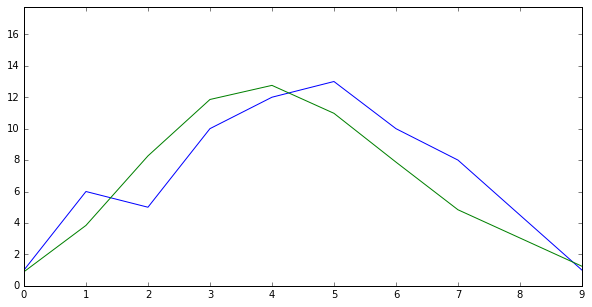

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5
plt.xlim(0, len(l_keys))
plt.ylim(0, max(Ni) + 5)
plt.plot(l_keys, l_values)
plt.plot(l_keys, Ni)
plt.show()